# Phase 2: Feature Extractions:
### Introduction: 
In this phase, different features are extracted from the preprocessed signals. These features are extracted from:
- Time-Domain
- Frequency Domain
- Time-Frequency Representation

All the features' types in this phase are in a form of values or images, which will direct the path of Machine Learning Model 'Phase 3'.

### Objective:
The Objective of this phase is to extract all the possible features from the preprocessed signals, so that it can be used as data in the Machine Learning Model (Phase 3).

### Notes:
- In this notebook, a signle of normal and abnormal signal are used for comparision.
- All the functions and variables, which are used in this notebook, are imported from functions.py file in the same repository.
- audio_index[0] is a normal PCG Signal.
- audio_index[6] is an abnormal PCG Signal.

In [191]:
import pandas as pd
from glob import glob

# importing the functions from functions.py
import functions
from functions import *

import warnings
warnings.filterwarnings('ignore')

In [192]:
# Loading all the audio files in one list:
folders = ['a', 'b', 'c', 'd', 'e', 'f']

audio_files = []
for folder in folders:
    audio = glob(f'/Users/mohammedlajam/Documents/GitHub/Datasets/Phonocardiogram/PhysioNet_2016/training-{folder}/*.wav')
    audio_files.append(audio)
audio_files = [item for elem in audio_files for item in elem]

# Loading the References:
references = []
for folder in folders:
    signal_csv = pd.read_csv(f'/Users/mohammedlajam/Documents/GitHub/Datasets/Phonocardiogram/PhysioNet_2016/training-{folder}/REFERENCE.csv', header=None)
    signal_csv.columns = ['signal_id', 'class']
    references.append(signal_csv)
signal_classes = pd.concat(references)
signal_classes.reset_index(inplace=True)
signal_classes.drop('index', inplace=True, axis=1)

In [193]:
# Variables:
SAMPLING_RATE = 1000
LOW_FC = 100
HIGH_FC = 10
FILTER_ORDER = 8
FRAME_SIZE = 512
HOP_SIZE = 64

## Signal Preprocessing:
Preprocess the signals using EMD and Digital-Filters (Bandpass Filter) with low and high cutoff frequencies of 100 and 10 Hz respectively as the signal of interest (PCG) lies between this range.

In [194]:
normal_signal, processed_signal_normal = emd_dfilter(file_path=audio_files, audio_index=0, order=FILTER_ORDER, sr=SAMPLING_RATE, low_fc=LOW_FC, high_fc=HIGH_FC, plot=False)
abnormal_signal, processed_signal_abnormal = emd_dfilter(file_path=audio_files, audio_index=6, order=FILTER_ORDER, sr=SAMPLING_RATE, low_fc=LOW_FC, high_fc=HIGH_FC, plot=False)

# Feature Extraction:

# 1. Time-Domain Features:
## 1.1. Amplitude Envelope:
- It is the maximum amplitudes value among all samples in each frame, which indicates the level of loudness of the audio signal.
- It is however, sensitive to outliers.
- It  returns a list of values.

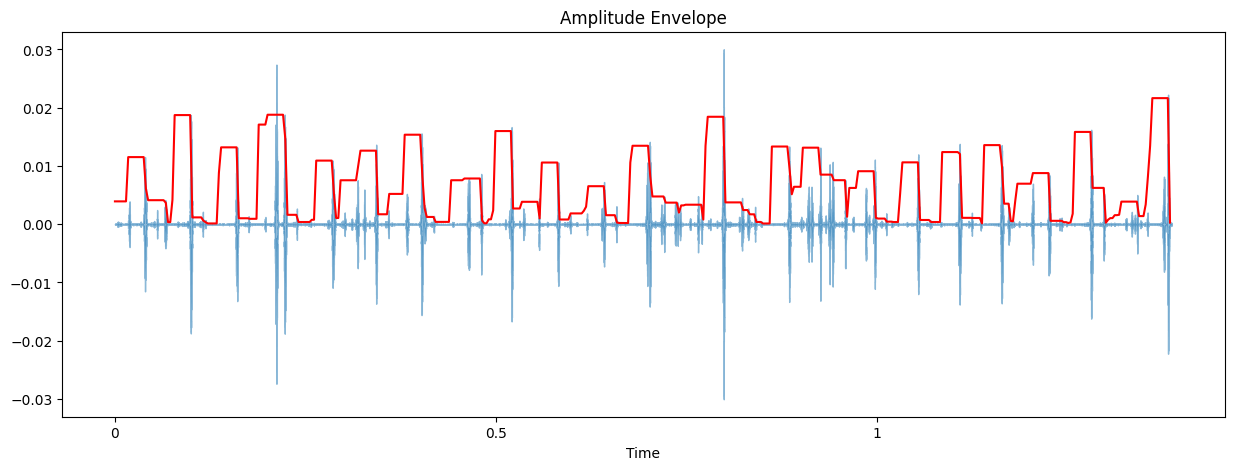

In [195]:
# Normal Signal:
amplitude_envelope(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

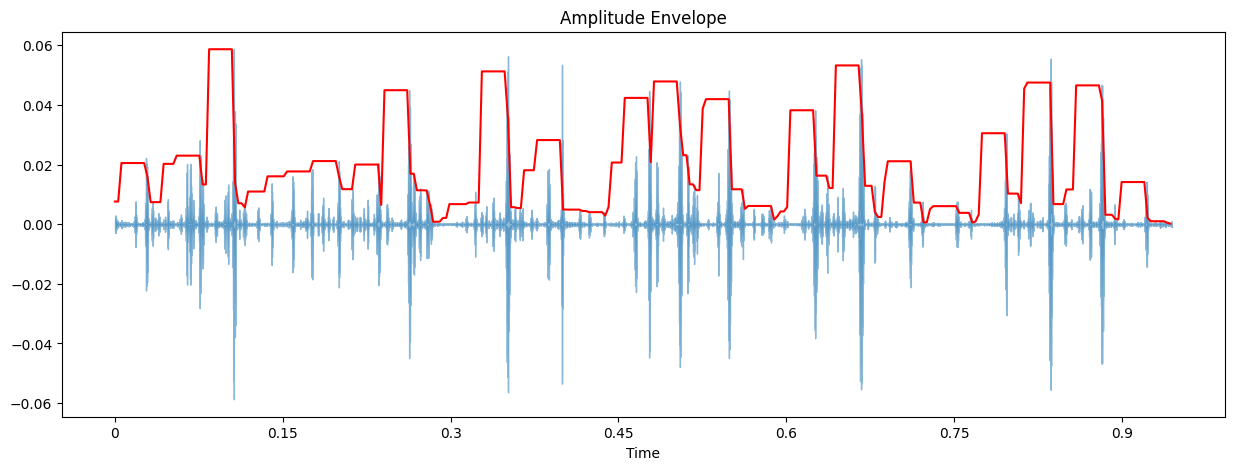

In [196]:
# Abnormal Signal:
amplitude_envelope(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

In [197]:
# Possible extra features to be extracted from amplitude envelope:
ae_normal = amplitude_envelope(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=False)
ae_abnormal = amplitude_envelope(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=False)
ae_data = {'Normal_Signal': [np.mean(ae_normal), np.max(ae_normal), np.min(ae_normal)],
        'Abnormal_Signal': [np.mean(ae_abnormal), np.max(ae_abnormal), np.min(ae_abnormal)]}
ae_extra_features = pd.DataFrame(data, index=['Mean', 'Max', 'Min'])
ae_extra_features

,Normal_Signal,Abnormal_Signal
Mean,0.001250,0.004104
Max,0.005307,0.012137
Min,0.000036,0.000171


## 1.2. Root-Mean Square Energy:
- The Root Mean Square Energy works by detecting the mean value within a frame, which is defined at the first step. 
- It acts as an indicator of loudness, since higher the energy, louder the sound. 
- It is however less sensitive to outliers as compared to the Amplitude Envelope.
- It  returns a list of values.

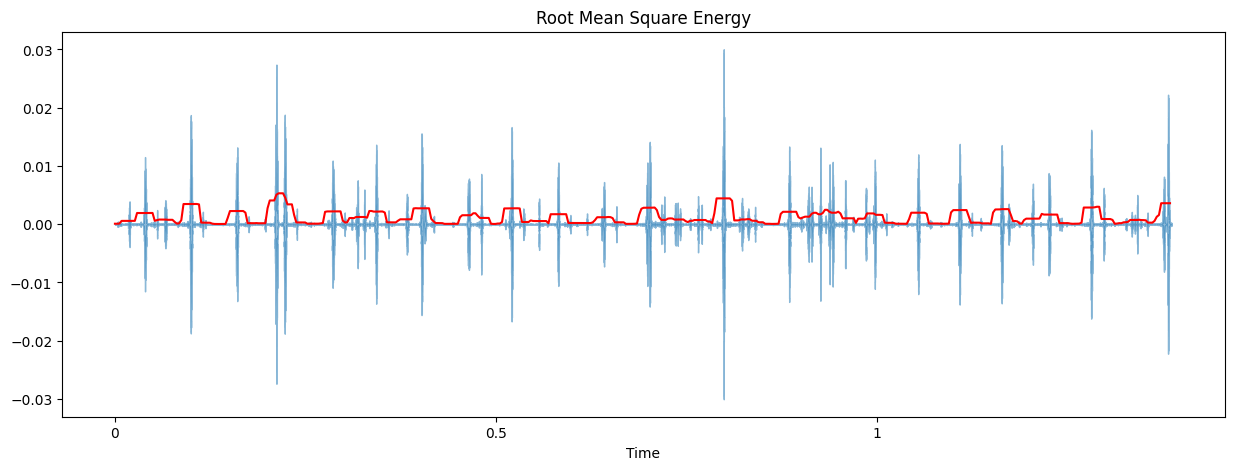

In [198]:
# Normal Signal:
root_mean_square(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

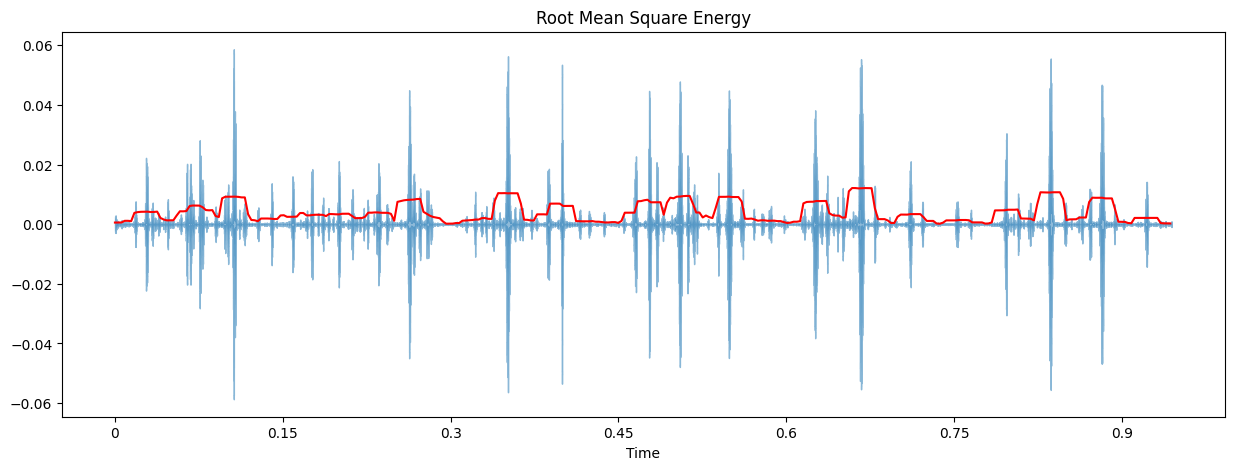

In [199]:
# Abnormal Signal:
root_mean_square(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

In [200]:
# possible extra features to be extracted from Root-Mean Square Energy:
rms_normal = root_mean_square(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=False)
rms_abnormal = root_mean_square(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=False)
rms_data = {'Normal_Signal': [np.mean(rms_normal), np.max(rms_normal), np.min(rms_normal)],
        'Abnormal_Signal': [np.mean(rms_abnormal), np.max(rms_abnormal), np.min(rms_abnormal)]}
rms_extra_features = pd.DataFrame(data, index=['Mean', 'Max', 'Min'])
rms_extra_features

,Normal_Signal,Abnormal_Signal
Mean,0.001250,0.004104
Max,0.005307,0.012137
Min,0.000036,0.000171


## 1.3. Zero-Crossing Rate:
- It is the number of times a waveform crosses the horizontal time axis.
- It returns a list of values.

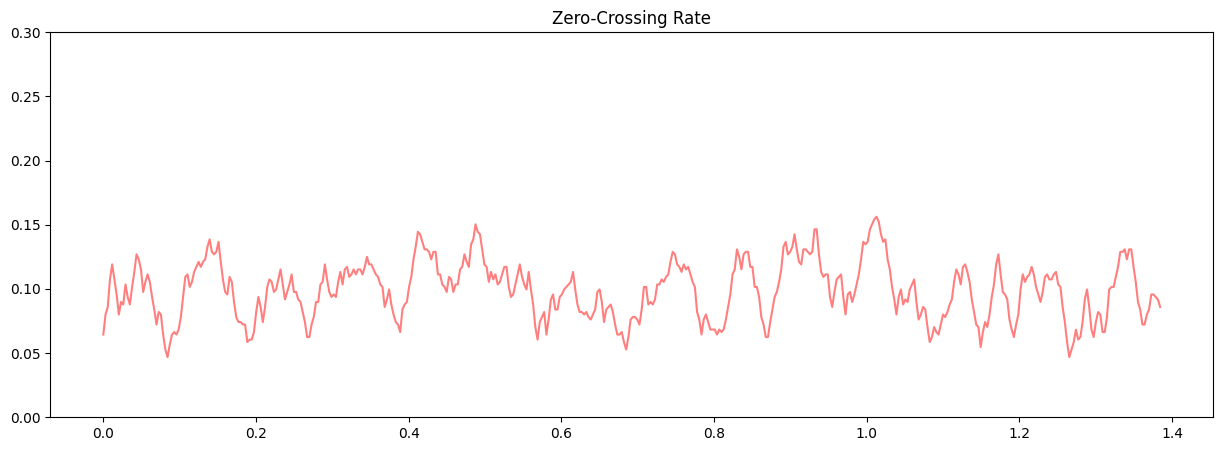

In [201]:
# Normal Signal:
zero_crossing_rate(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

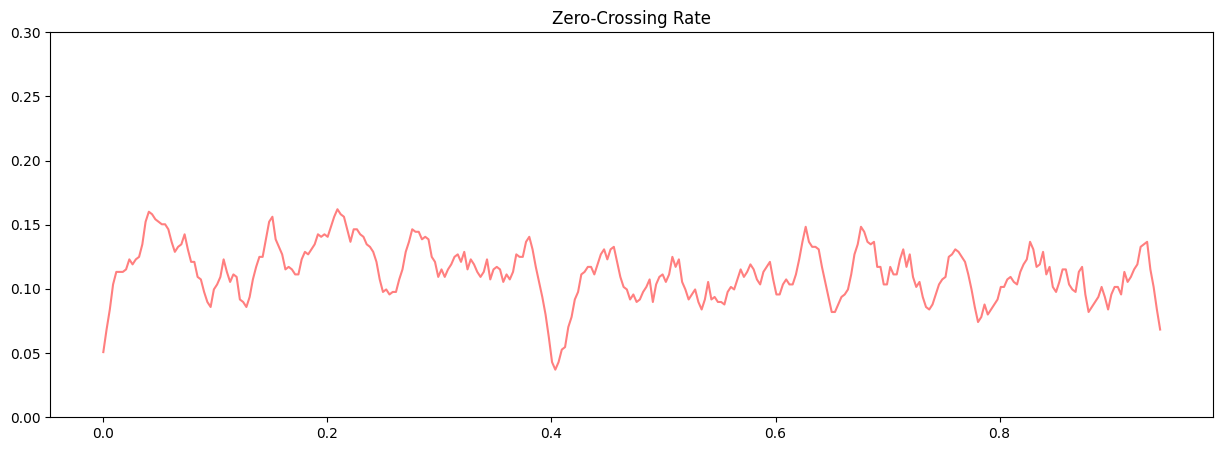

In [202]:
# Abnormal Signal:
zero_crossing_rate(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

In [203]:
# possible extra features to be extracted from Zero-Crossing Rate:
zcr_normal = zero_crossing_rate(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=False)
zcr_abnormal = zero_crossing_rate(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=False)
zcr_data = {'Normal_Signal': [np.mean(zcr_normal), np.max(zcr_normal), np.min(zcr_normal)],
        'Abnormal_Signal': [np.mean(zcr_abnormal), np.max(zcr_abnormal), np.min(zcr_abnormal)]}
zcr_extra_features = pd.DataFrame(data, index=['Mean', 'Max', 'Min'])
zcr_extra_features

,Normal_Signal,Abnormal_Signal
Mean,0.001250,0.004104
Max,0.005307,0.012137
Min,0.000036,0.000171


# 2. Frequency-Domain Features:

## 2.1. Band Energy Ratio:
- It provides the relation between the lower and higher frequency bands.
- It starts with converting the Signal (Time-Domain) to Spectrogram (Time-Frequency Representation).
- Identifiying the frequency threshold in the Spectrogram of the signal, in which the above and below areas of this threshold are considered as high and low frequency areas. Then, it calculates the ratio within each frame.
- It returns a list of values.

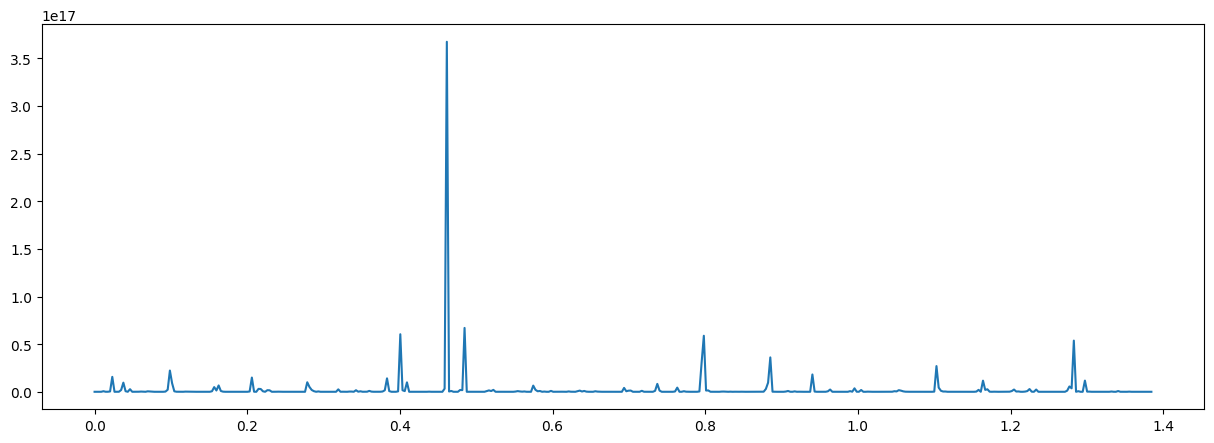

In [204]:
# Normal Signal:
band_energy_ratio(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, split_frequency=256, sr=SAMPLING_RATE, plot=True)

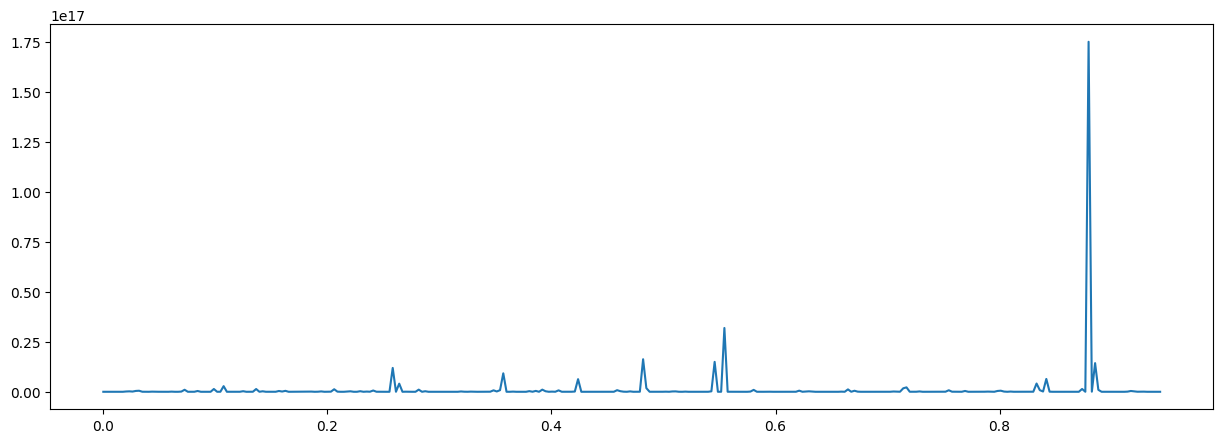

In [205]:
# Abnormal Signal:
band_energy_ratio(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, split_frequency=256, sr=SAMPLING_RATE, plot=True)

In [206]:
# possible extra features to be extracted from Band Energy Ratio:
ber_normal = band_energy_ratio(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, sr=SAMPLING_RATE, split_frequency=256, plot=False)
ber_abnormal = band_energy_ratio(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE,  sr=SAMPLING_RATE, split_frequency=256, plot=False)
ber_data = {'Normal_Signal': [np.mean(ber_normal), np.max(ber_normal), np.min(ber_normal)],
        'Abnormal_Signal': [np.mean(ber_abnormal), np.max(ber_abnormal), np.min(ber_abnormal)]}
ber_extra_features = pd.DataFrame(data, index=['Mean', 'Max', 'Min'])
ber_extra_features

,Normal_Signal,Abnormal_Signal
Mean,0.001250,0.004104
Max,0.005307,0.012137
Min,0.000036,0.000171


## 2.2. Spectral Centroid:
- It provides the frequency band where most of the energy is concentrated.
- It returns a list of values.

<function matplotlib.pyplot.show(close=None, block=None)>

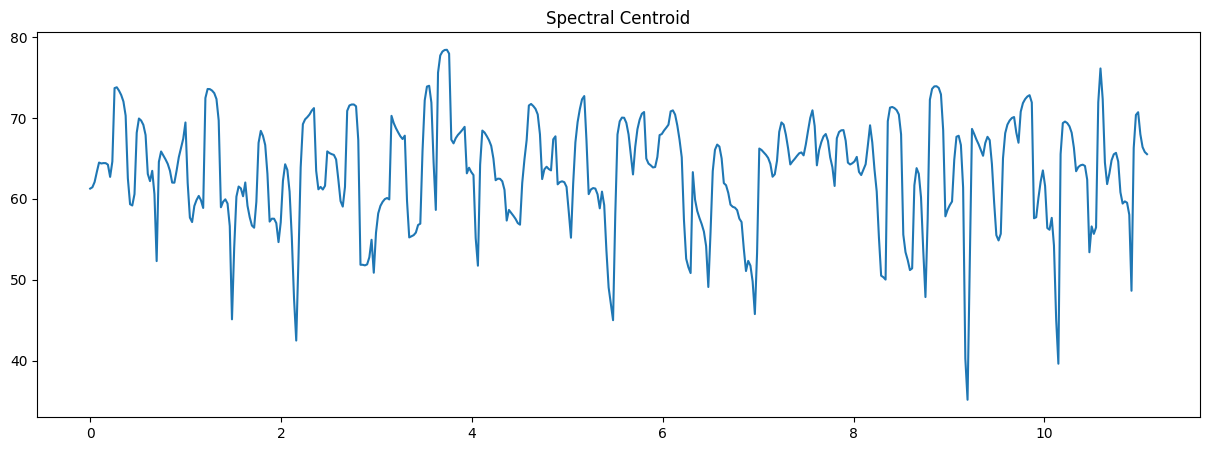

In [207]:
# Normal Signal:
spectral_centroid(processed_signal=processed_signal_normal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

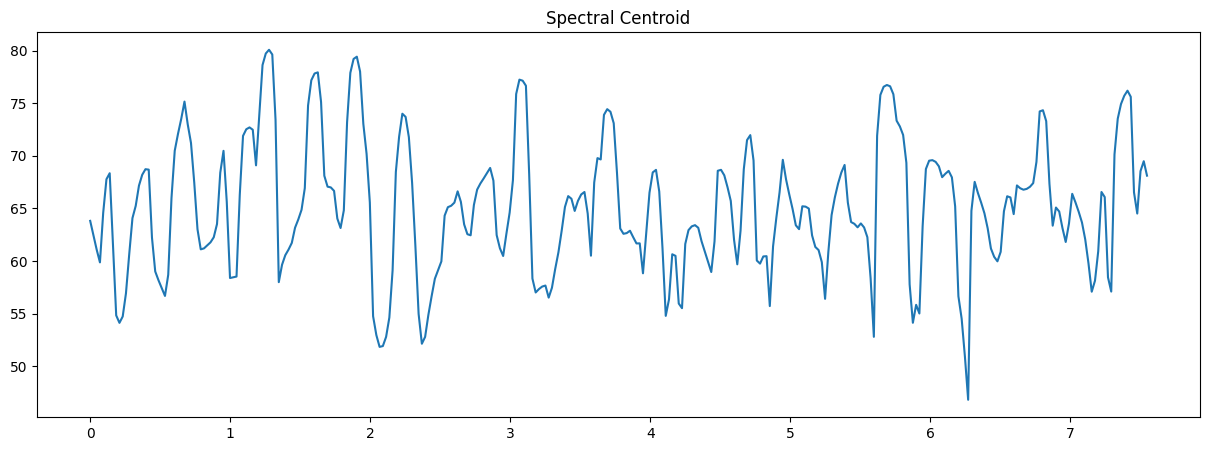

In [208]:
# Abnormal Signal:
spectral_centroid(processed_signal=processed_signal_abnormal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

In [209]:
# possible extra features to be extracted from Spectral Centroid:
sc_normal = spectral_centroid(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, sr=SAMPLING_RATE, plot=False)
sc_abnormal = spectral_centroid(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE,  sr=SAMPLING_RATE, plot=False)
sc_data = {'Normal_Signal': [np.mean(sc_normal), np.max(sc_normal), np.min(sc_normal)],
        'Abnormal_Signal': [np.mean(sc_abnormal), np.max(sc_abnormal), np.min(sc_abnormal)]}
sc_extra_features = pd.DataFrame(data, index=['Mean', 'Max', 'Min'])
sc_extra_features

,Normal_Signal,Abnormal_Signal
Mean,0.001250,0.004104
Max,0.005307,0.012137
Min,0.000036,0.000171


## 2.3. Spectral Bandwidth:
- It is drived to the spectral centroid.
- It is the spectral range of interest around the centroid, that is, the variance from the spectral centroid.
- It returns a list of values.

<function matplotlib.pyplot.show(close=None, block=None)>

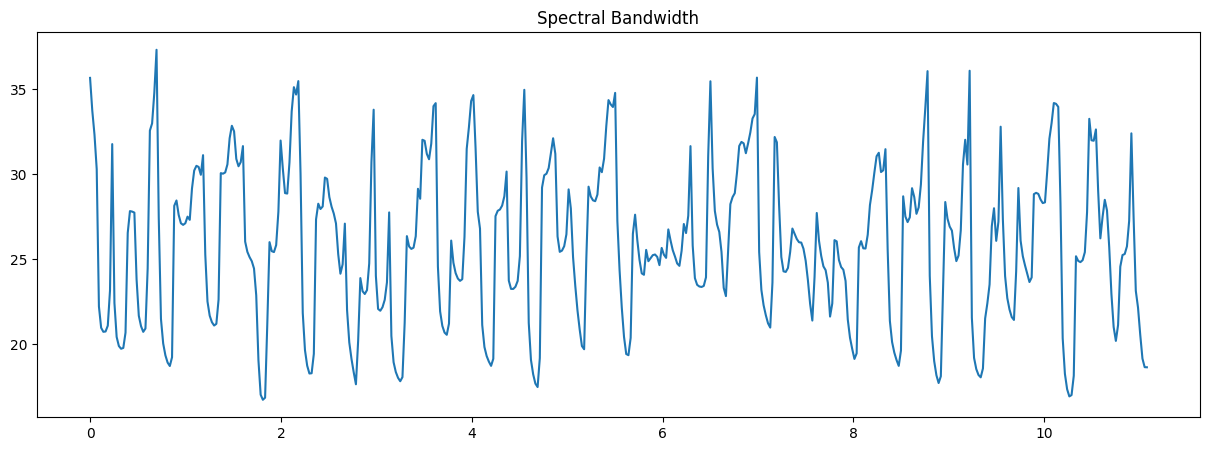

In [210]:
# Normal Signal:
spectral_bandwidth(processed_signal=processed_signal_normal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

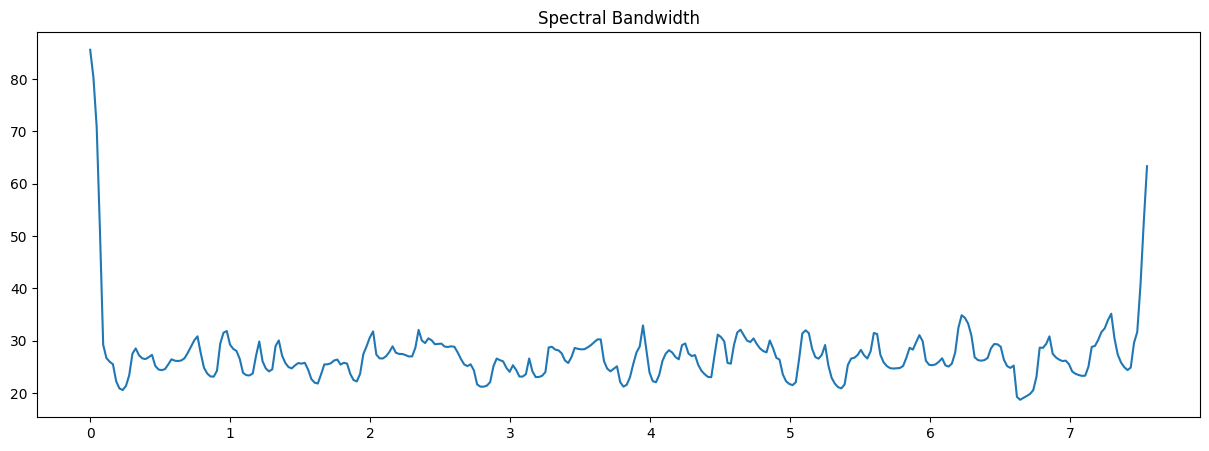

In [211]:
# Abnormal Signal:
spectral_bandwidth(processed_signal=processed_signal_abnormal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, plot=True)

In [212]:
# possible extra features to be extracted from Spectral Bandwidth:
sb_normal = spectral_bandwidth(processed_signal=processed_signal_normal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, sr=SAMPLING_RATE, plot=False)
sb_abnormal = spectral_bandwidth(processed_signal=processed_signal_abnormal, frame_size=FRAME_SIZE, hop_size=HOP_SIZE,  sr=SAMPLING_RATE, plot=False)
sb_data = {'Normal_Signal': [np.mean(sb_normal), np.max(sb_normal), np.min(sb_normal)],
        'Abnormal_Signal': [np.mean(sb_abnormal), np.max(sb_abnormal), np.min(sb_abnormal)]}
sb_extra_features = pd.DataFrame(data, index=['Mean', 'Max', 'Min'])
sb_extra_features

,Normal_Signal,Abnormal_Signal
Mean,0.001250,0.004104
Max,0.005307,0.012137
Min,0.000036,0.000171


# 3. Time-Frequency Domain Features:

## Features after Signal Preprocessing:
## 3.1. Spectogram:
- It is a Time-Frequency Represenation of a signal.
- The Spectrogram is calculated by apply the Short Time Fourier Transform on a signal by applying the Fourier Transform on each frame of the signal.
- It returns an image.

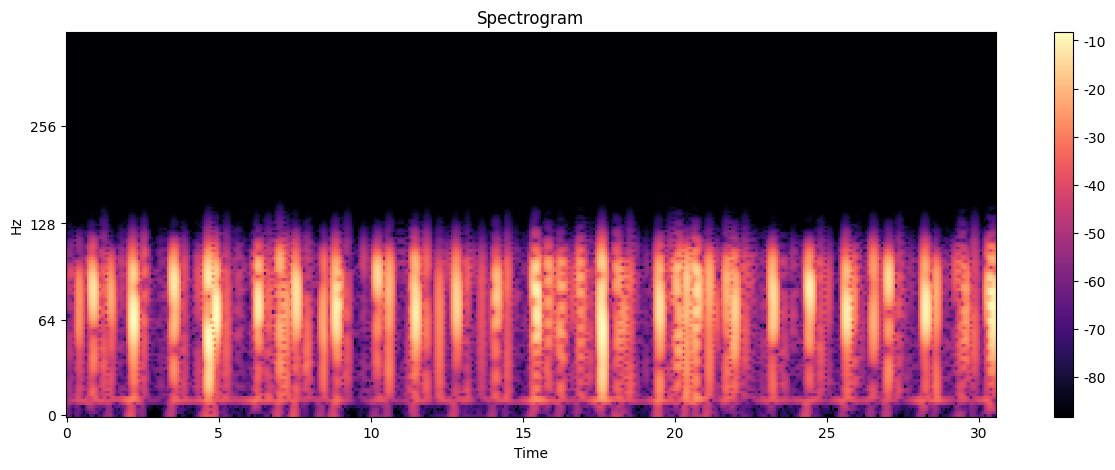

In [213]:
# Normal Signal:
spectrogram(processed_signal=processed_signal_normal, sr=SAMPLING_RATE, frame_size=512, hop_size=HOP_SIZE)

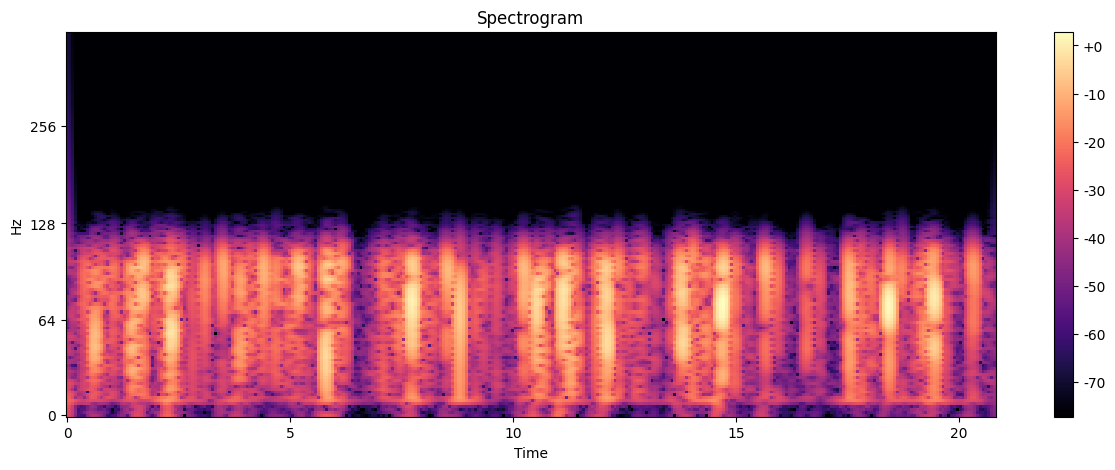

In [214]:
# Abnormal Signal:
spectrogram(processed_signal=processed_signal_abnormal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE)

## 3.2. Mel-Spectogram:

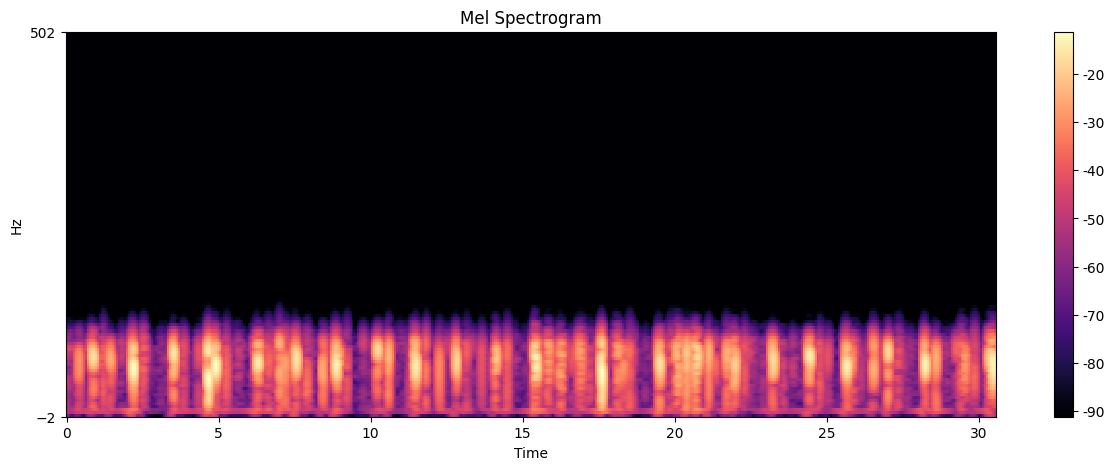

In [215]:
# Normal Signal:
mel_spectrogram(processed_signal=processed_signal_normal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, n_mels=128)

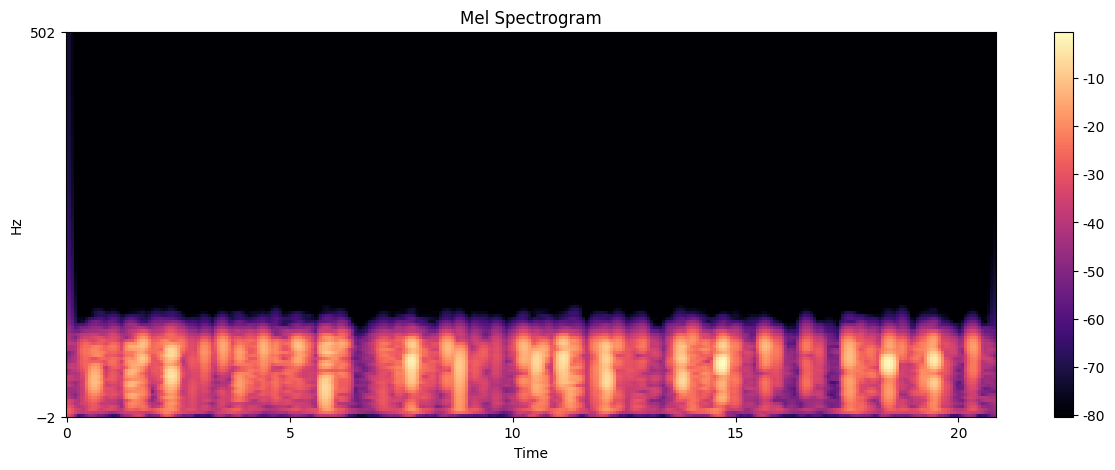

In [216]:
# Abnormal Signal:
mel_spectrogram(processed_signal=processed_signal_abnormal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, n_mels=128)

## 3.3. Mel Frequency Cepstral Coefficients (MFCCs):
### 3.3.1.MFCCs

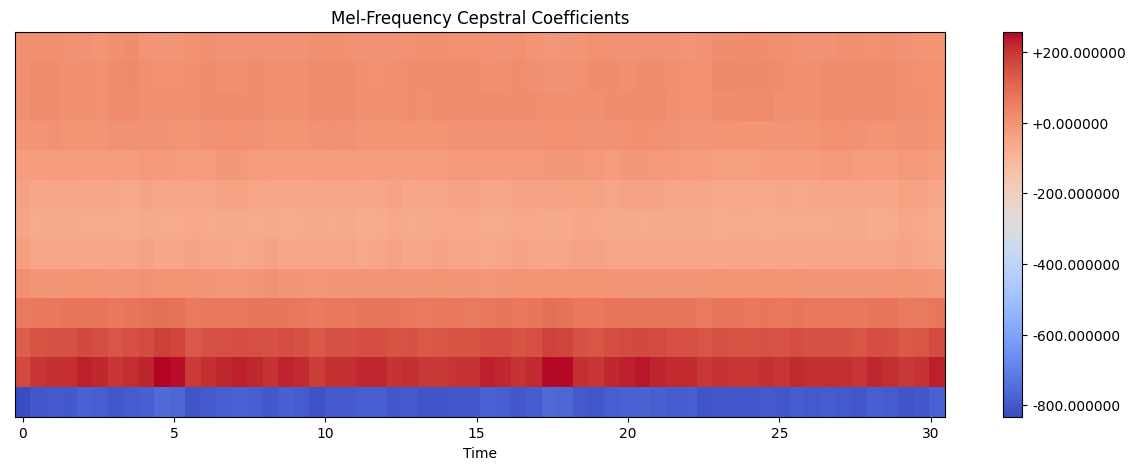

In [217]:
# Normal Signal:
mel_frequency_cepstral_coefficients(processed_signal=processed_signal_normal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='mfccs')

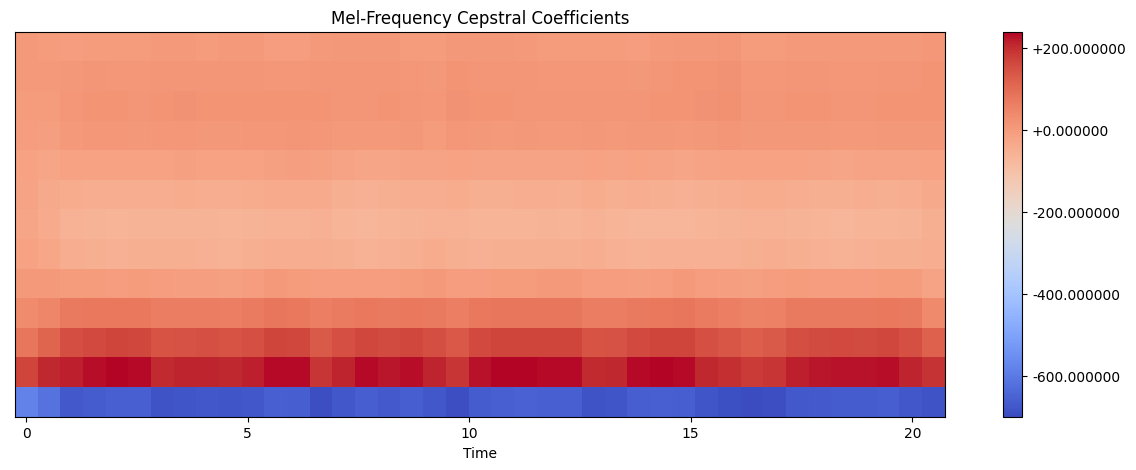

In [218]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(processed_signal=processed_signal_abnormal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='mfccs')

### 3.3.2. Delta_1:

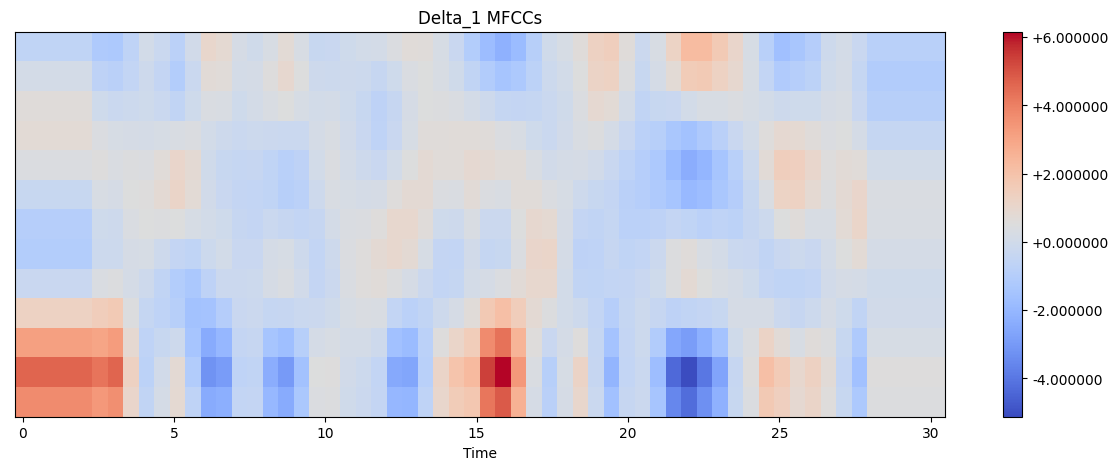

In [219]:
# Normal Signal:
mel_frequency_cepstral_coefficients(processed_signal=processed_signal_normal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='delta_1')

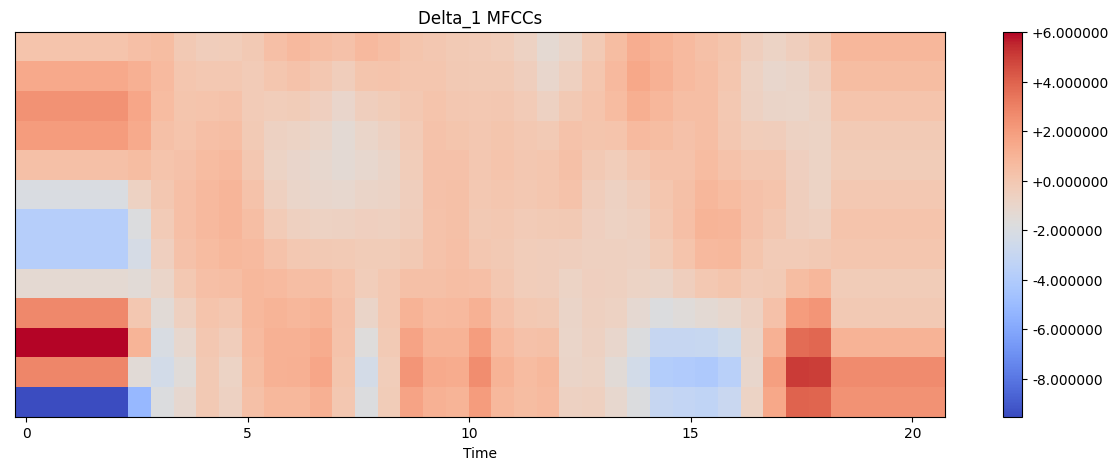

In [220]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(processed_signal=processed_signal_abnormal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='delta_1')

### 3.3.3. Delta_2

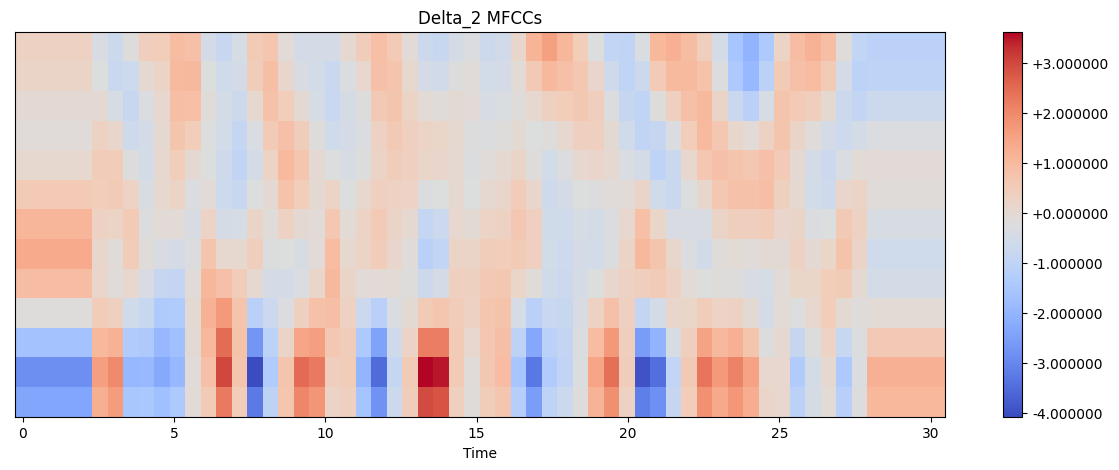

In [221]:
# Normal Signal:
mel_frequency_cepstral_coefficients(processed_signal=processed_signal_normal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='delta_2')

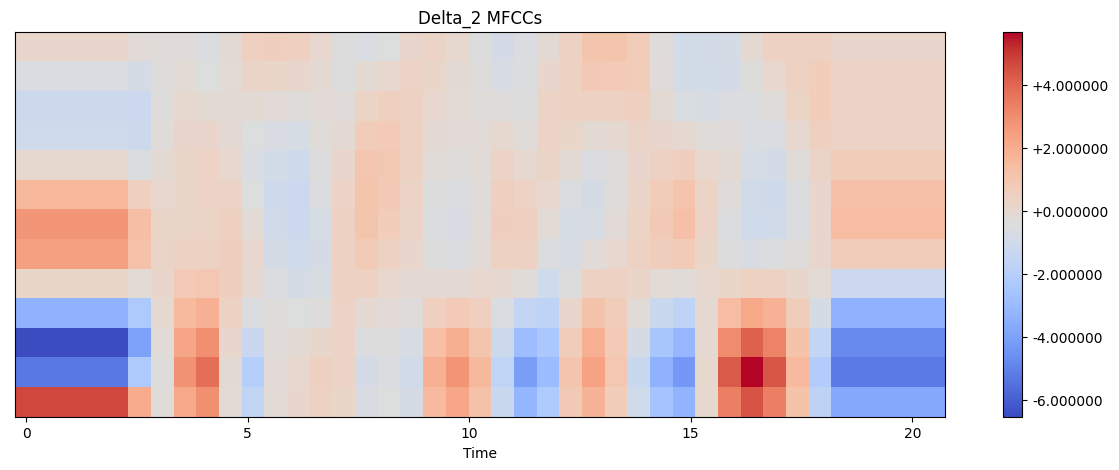

In [222]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(processed_signal=processed_signal_abnormal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='delta_2')

## Notice:
Features of Time-Frequency represenations before signal preprocessing:

## 3.1. Spectrogram:

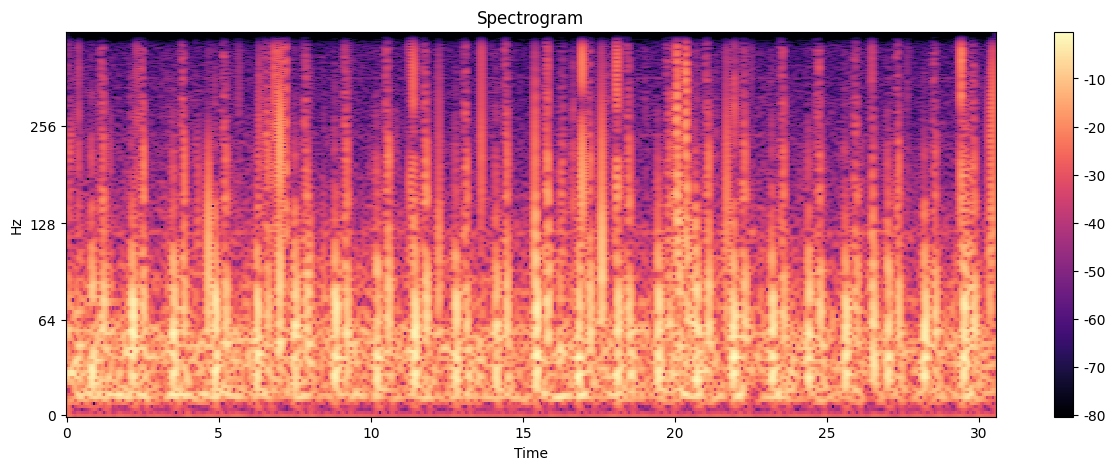

In [223]:
# Normal Signal:
spectrogram(processed_signal=normal_signal, sr=SAMPLING_RATE, frame_size=512, hop_size=HOP_SIZE)

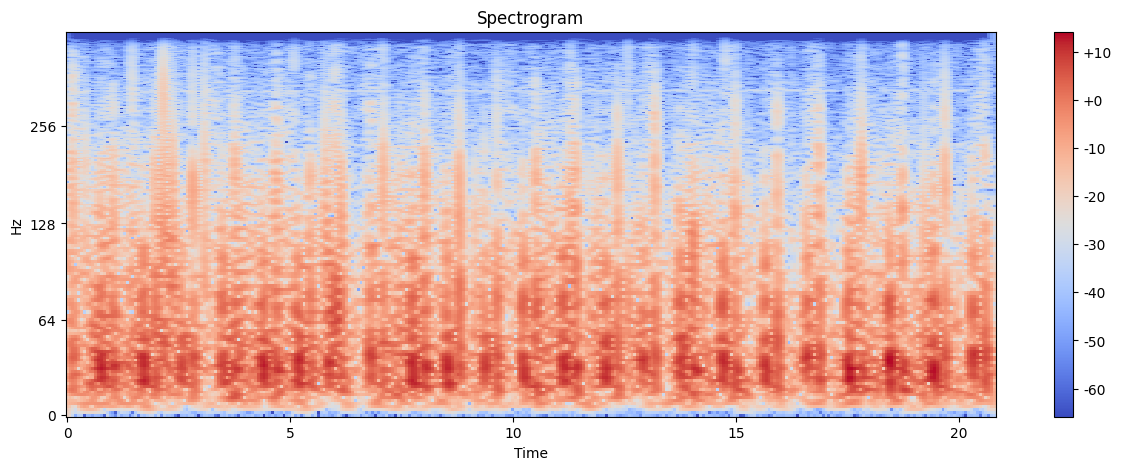

In [224]:
# Abnormal Signal:
spectrogram(processed_signal=abnormal_signal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE)

## 3.2. Mel Spectrogram:

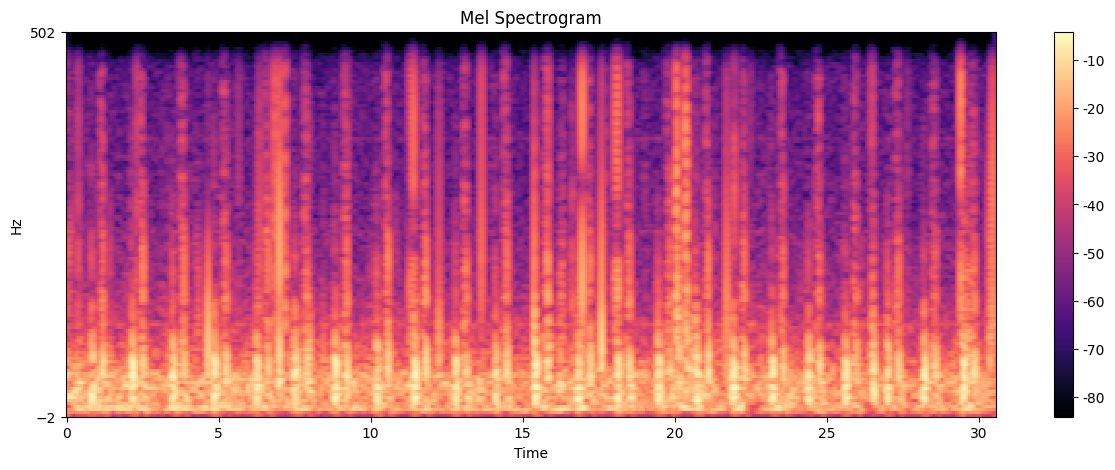

In [225]:
# Normal Signal:
mel_spectrogram(processed_signal=normal_signal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, n_mels=128)

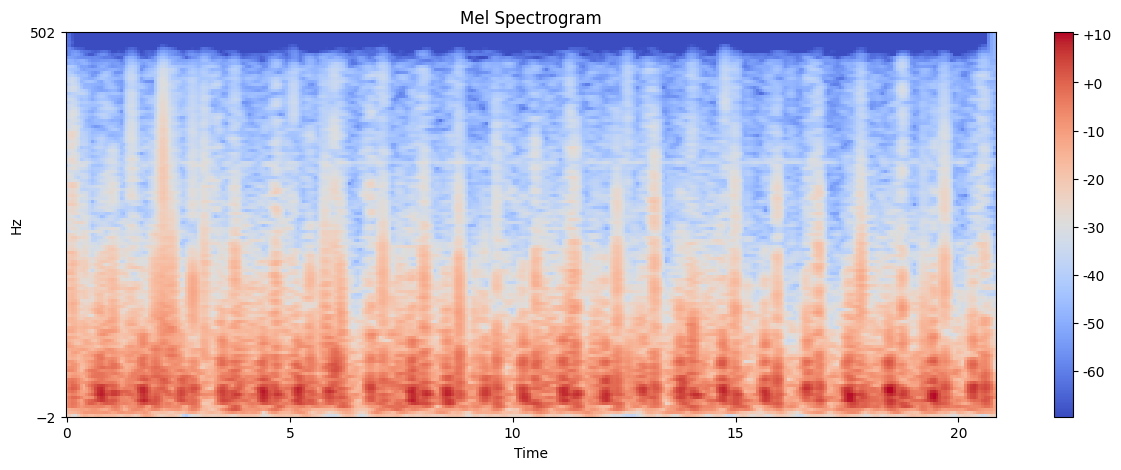

In [226]:
# Abnormal Signal:
mel_spectrogram(processed_signal=abnormal_signal, sr=SAMPLING_RATE, frame_size=FRAME_SIZE, hop_size=HOP_SIZE, n_mels=128)

## 3.3. Mel Frequency Cepstral Coefficients (MFCCs):
### 3.3.1. MFCCs:

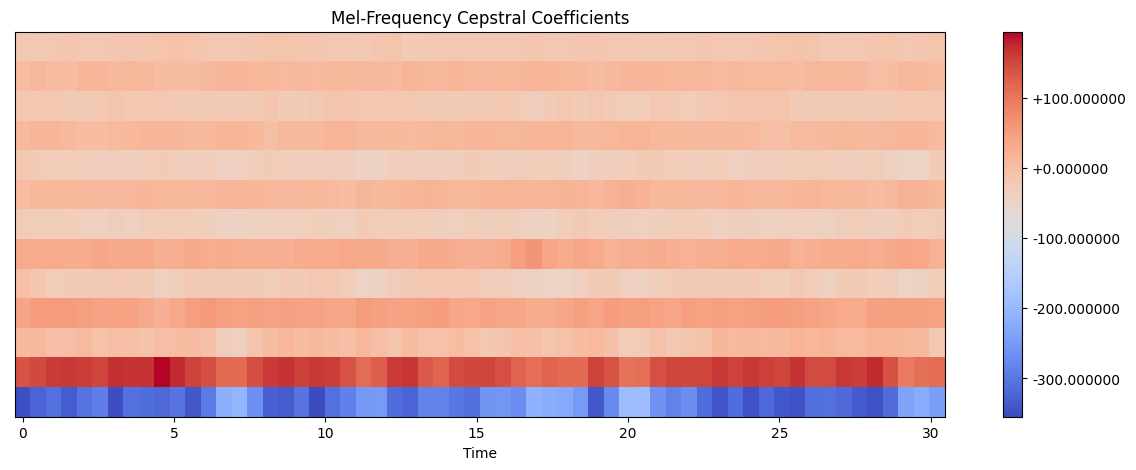

In [227]:
# Normal Signal:
mel_frequency_cepstral_coefficients(processed_signal=normal_signal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='mfccs')

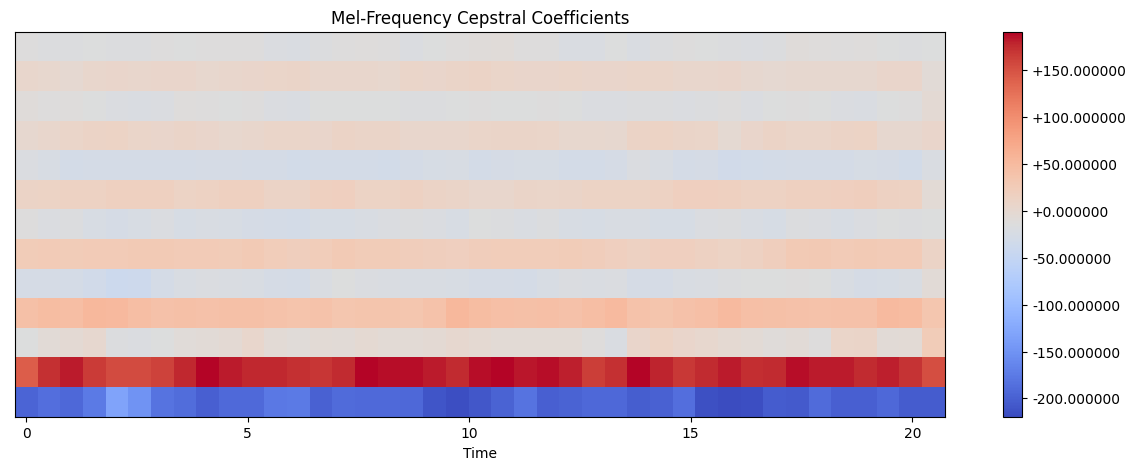

In [228]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(processed_signal=abnormal_signal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='mfccs')

### 3.3.2. Delta_1:

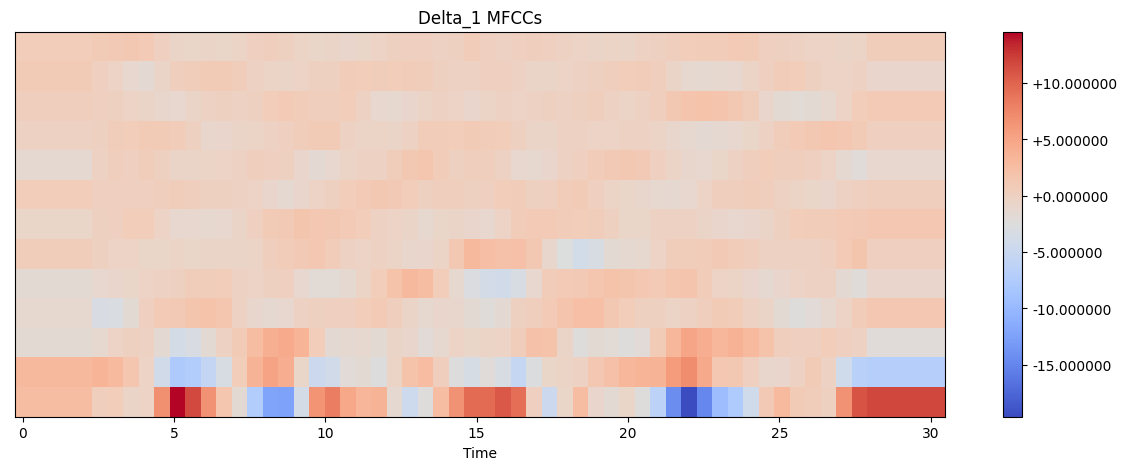

In [229]:
# Normal Signal:
mel_frequency_cepstral_coefficients(processed_signal=normal_signal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='delta_1')

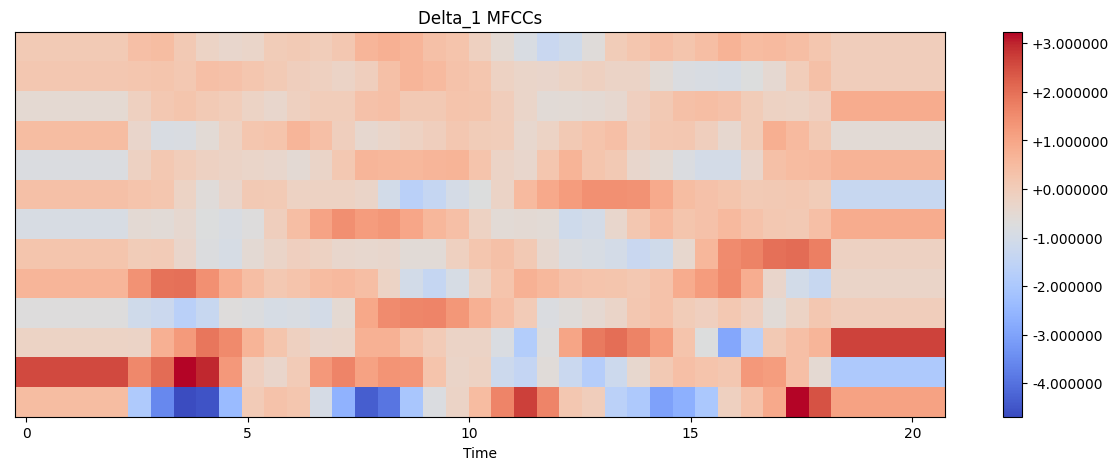

In [230]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(processed_signal=abnormal_signal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='delta_1')

### 3.3.3. Delta_2:

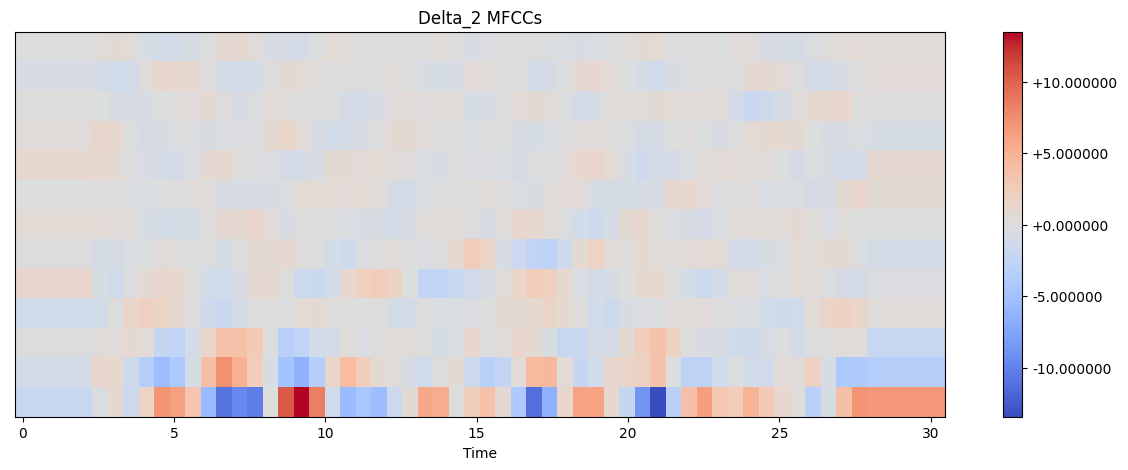

In [231]:
# Normal Signal:
mel_frequency_cepstral_coefficients(processed_signal=normal_signal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='delta_2')

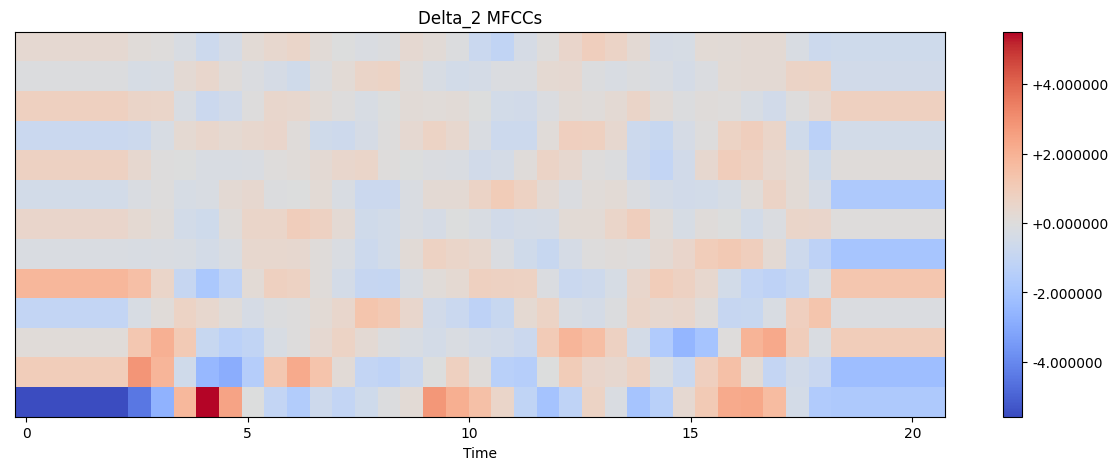

In [232]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(processed_signal=abnormal_signal, sr= SAMPLING_RATE, n_mfcc=13, plot=True, mfcc_type='delta_2')